<BarContainer object of 4 artists>

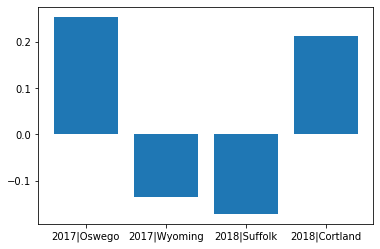

In [2]:
import pandas as P
from matplotlib import pyplot as PP
csv_load = P.read_csv('https://raw.githubusercontent.com/letdata/provisional/master/ny_res_median_units_price_by_county_clean.csv', index_col=['county', 'year_'])

g_data = csv_load
g_data['transactions'] = g_data['transactions'].str.replace(',', '').astype(int)
g_data['transactions_pc'] = g_data.sort_values(by=['county', 'year_']).groupby(['county']).transactions.pct_change(1)
g_data['median_'] = g_data['median_'].str.replace(',', '').astype(int)
g_data['median_pc'] = g_data.sort_values(by=['county', 'year_']).groupby(['county']).median_.pct_change()

tmax_2017 = g_data.query("year_ == 2017").sort_values(by=['county', 'year_']).transactions_pc.max()
tmax_2018 = g_data.query("year_ == 2018").sort_values(by=['county', 'year_']).transactions_pc.max()
tmax2017 = g_data.loc[g_data['transactions_pc'] == tmax_2017]
tmax2018 = g_data.loc[g_data['transactions_pc'] == tmax_2018]

tmin_2017 = g_data.query("year_ == 2017").sort_values(by=['county', 'year_']).transactions_pc.min()
tmin_2018 = g_data.query("year_ == 2018").sort_values(by=['county', 'year_']).transactions_pc.min()
tmin2017 = g_data.loc[g_data['transactions_pc'] == tmin_2017]
tmin2018 = g_data.loc[g_data['transactions_pc'] == tmin_2018]

tmaxall = P.concat([tmax2017, tmin2017, tmin2018, tmax2018])
tplot = tmaxall.iloc[:, 2:3].reset_index()

tplot['newc'] = tplot['year_'].astype(str) + "|" + tplot['county']

PP.bar(tplot['newc'], tplot['transactions_pc'])
